## Exercise 12

Given a 2-dimensional dataset like data1.csv, data2.csv or data3.csv, implement and apply k-means hard clustering with k = 2 and k = 3. Use the Euclidean distance as dissimilarity metric. At each training iteration of the algorithm, compute the quantization error and plot data points and centroids with a different color for each cluster.


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [70]:
frame = pd.read_csv("data1.csv")

     x   y
0    8  49
1   24  30
2    3  48
3   39  47
4   23  39
5   15  45
6   48  38
7   10  44
8   30  18
9   34   0
10   2  34
11  34  10
12  14  17
13  34   8
14  49  13
15  48  42
16  24  30
17  15  17
18  36   4
19  43  40
20  16  27
21   9  27
22  29  19
23  22  14
24   2   0
25  27  13
26  44  12
27   4  42
28  31   3
29   1   6
..  ..  ..
70  49  93
71  88  97
72  88  40
73  61  49
74  65  80
75  94  94
76  46  68
77  77  42
78  78  56
79  98  45
80  92  91
81  98  66
82  79  74
83  83  43
84  70  70
85  91  54
86  70  94
87  97  53
88  42  60
89  91  41
90  64  54
91  95  91
92  57  73
93  85  60
94  77  80
95  65  64
96  85  69
97  75  98
98  56  68
99  52  58

[100 rows x 2 columns]


In [71]:
k = 3

In [72]:
def plot(frame, k, prototype):
    for i in range(k):
        proto = prototype.iloc[i]
        mask = frame['tag'] == i
        elem = (frame[mask])
        plt.plot(proto['x'], proto['y'], 'o', markersize=14, label=[elem['tag']])
        plt.plot(elem['x'], elem['y'], 'o', label=[elem['tag']])
    plt.show()

In [73]:
np.random.seed(1)

In [74]:
def norm_cal(x,y):
    return math.sqrt(x**2 + y**2)

In [80]:
def k_means(k, df, delta):
    x = df["x"]
    y = df["y"]
    tag = [-1]*len(df)
    newlist = list(zip(x,y,tag))
    frame = pd.DataFrame(data = newlist, columns=['x', 'y', 'tag'])
    
    #init centroid
    centroids = frame.iloc[np.random.randint(0, len(frame)-1, k)]
    
    
    exit_boolean = True
    
    while exit_boolean:
        # assign nearest point to a prototype
        for i in range(len(frame)):
            mn = np.inf
            point = frame.iloc[i]
            for index in range(len(centroids)):
                distance = np.abs(np.linalg.norm(point-centroids.iloc[index]))
                if (distance < mn):
                    frame.iloc[i][-1] = index
                    mn = distance

        # print time
        plot(frame, k, centroids)
        
        # find new centroid
        tmp = []
        for centroid in range(len(centroids)):
            mask = frame['tag'] == centroid
            avg = np.sum(frame[mask])
            avg = avg / len(frame[mask])
            tmp.append(avg)
        tmpcentroids = pd.DataFrame(data = tmp, columns=['x', 'y', 'tag'])

        # exit option
        quantization_error = 0
        for i in range (k):
            c = centroids.iloc[i]
            t = tmpcentroids.iloc[i]
            c = norm_cal(c['x'], c['y'])
            t = norm_cal(t['x'], t['y'])
            quantization_error = math.pow(c - t, 2)
        print(quantization_error)
        centroids = tmpcentroids
        if (quantization_error  < delta):
            exit_boolean = 0
        

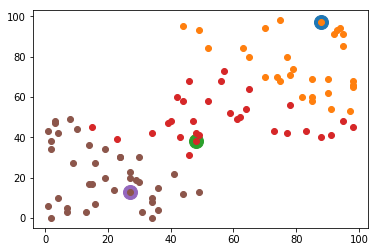

2.232091955613364


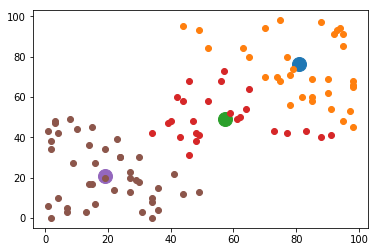

0.5462037306090122


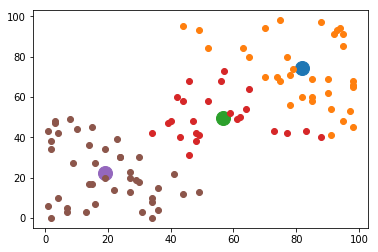

0.0


In [82]:
k_means(k, frame, 0.5)

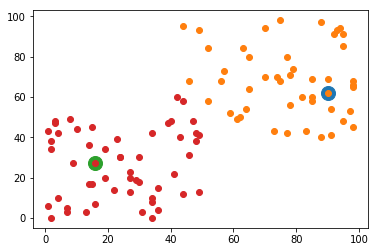

22.67663490027507


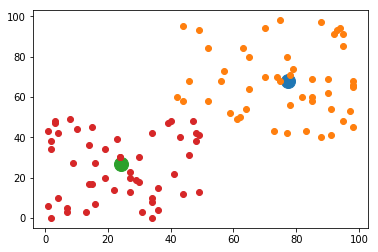

2.0393752855059613


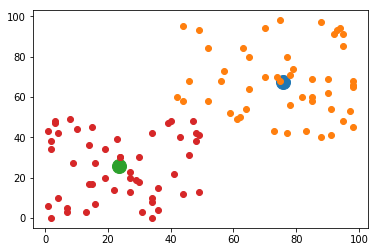

0.0


In [83]:
k_means(2, frame, 0.1)